# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import itertools, os

from sklearn.decomposition import PCA

In [32]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [33]:
# TODO: select your predictive columns
X = songs.drop(columns=['song', 'genre', 'filename'])

# TODO: select your song-name column for later manipulation
song_names = songs['song']

# TODO: select your genre column for later manipulation
genres = songs['genre'] 

In [34]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4, svd_solver="randomized")

# TODO: fit & transform your predictors
x_transformed = pca.fit_transform(X)

# TODO: view your PCA components
x_transformed


array([[ 8.40612251e-02, -7.74818980e-02, -6.37809582e-02,
        -6.21438162e-02],
       [ 3.32043958e-01, -1.54052989e-01, -6.02912926e-02,
         1.51896433e-01],
       [-1.16859655e-02,  1.94544223e-01, -4.63696931e-02,
         4.69841244e-02],
       [ 9.23741778e-03, -1.09552640e-01, -1.11190149e-01,
        -8.99016151e-02],
       [ 3.08582046e-01, -4.06240981e-02, -1.19070752e-01,
         1.49662737e-01],
       [-1.28598014e-01, -9.70058445e-02, -9.95646107e-02,
        -2.50076029e-02],
       [-1.53262370e-01,  8.32464065e-02,  1.18595453e-01,
        -7.22858010e-02],
       [ 1.54651882e-01, -5.09736060e-01,  1.53240140e-02,
        -5.10323621e-02],
       [ 1.13302611e-01, -1.48520078e-02,  3.14005932e-01,
        -7.21976262e-02],
       [ 1.32964482e-01, -7.99563929e-03,  2.25705515e-01,
         8.69031470e-02],
       [-1.15123852e-01,  1.51893381e-02,  9.67335551e-02,
        -6.97230062e-02],
       [-7.46361729e-02, -1.28541976e-01, -2.04929256e-01,
      

In [35]:
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])
pca_df

,PC1,PC2,PC3,PC4
0,0.084061,-0.077482,-0.063781,-0.062144
1,0.332044,-0.154053,-0.060291,0.151896
2,-0.011686,0.194544,-0.046370,0.046984
3,0.009237,-0.109553,-0.111190,-0.089902
4,0.308582,-0.040624,-0.119071,0.149663
...,...,...,...,...
56,-0.137086,0.073600,-0.171687,0.035073
57,0.422397,-0.047345,-0.085399,-0.007523
58,0.093011,0.142711,0.060457,0.102581
59,0.293078,0.000349,-0.091520,0.022839


In [36]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(data=x_transformed, columns=[f'PC{i+1}' for i in range(4)])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df = pd.concat([pca_df, song_names, genres], axis=1)

# TODO: view the first 5 rows of your merged df
merged_df.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062144,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151896,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046984,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089902,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149663,Belong to the World,hip hop


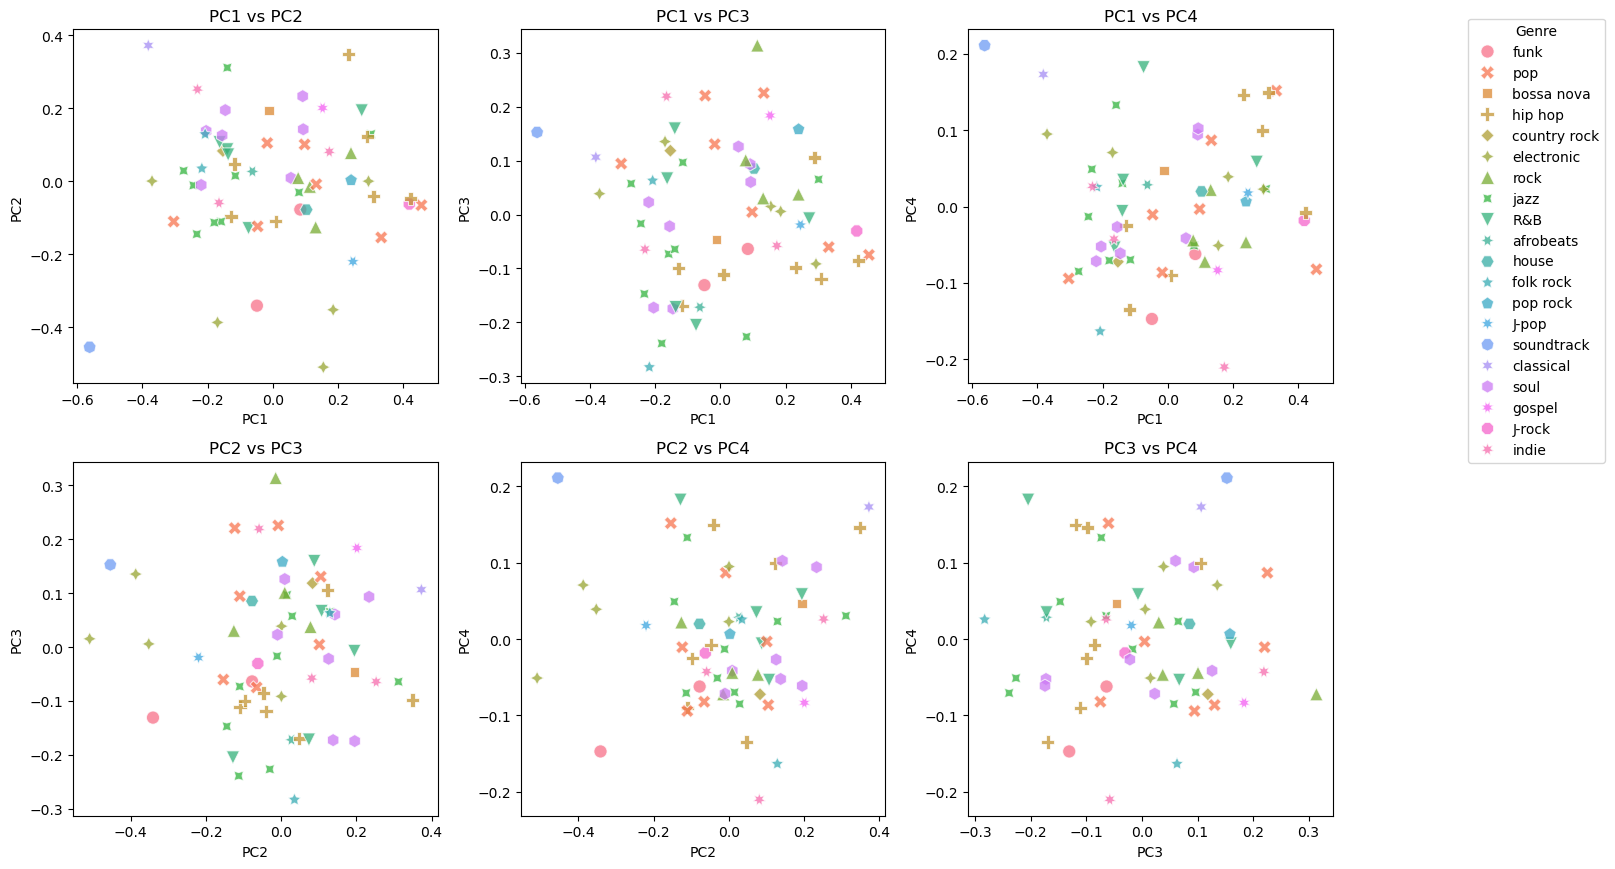

In [37]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

pc_cols = [c for c in ['PC1','PC2','PC3','PC4'] if c in merged_df.columns]
pairs = list(itertools.combinations(pc_cols, 2))

ncols = 3
nrows = (len(pairs) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5.5*ncols, 4.4*nrows), squeeze=False)

last_ax = None
for i, (x, y) in enumerate(pairs):
    ax = axes[i // ncols, i % ncols]
    sns.scatterplot(data=merged_df, x=x, y=y, hue='genre', style='genre', s=90, alpha=0.75, ax=ax)
    ax.set_title(f'{x} vs {y}')
    last_ax = ax

# grab handles/labels once, then remove per-axes legends
handles, labels = last_ax.get_legend_handles_labels()
for ax in axes.flat:
    leg = ax.get_legend()
    if leg: leg.remove()

# hide unused subplots
for j in range(len(pairs), nrows*ncols):
    axes[j // ncols, j % ncols].axis('off')

# single legend at top-right of the figure
plt.tight_layout(rect=[0, 0, 0.82, 1])  # leave space on the right
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.98), title='Genre', frameon=True)
plt.show()


## Observations of PCA Scatter Panels:

**Distribution in PC space (by genre)**
- Across PC pairs (PC1–PC4), the genre clouds overlap substantially with only modest shifts by genre.
- PC1 shows the clearest separation: some genres sit slightly to the right (higher PC1), while others skew left (lower PC1). 
- PC2 and PC4 look centered with similar spread across genres; PC3 shows the most within-genre variability.

**Highest/lowest average on PC1**
- Using all genres (includes singletons): highest ≈ J-rock; lowest ≈ Soundtrack.
- More robust (n ≥ 3 per genre): highest = Hip hop (0.145), next Rock (0.140); lowest = Jazz (-0.107), then Indie (-0.074) and Soul (~-0.069).

**Standard deviation (n ≥ 3)**
- Indie (~0.162) and R&B (~0.155) exhibit the widest spread on PC3; Rock/Pop/Jazz/Soul are tighter (≈0.12–0.13).
- This matches the PC2 vs PC3 and PC3 vs PC4 panels where those genres show taller vertical scatter.

**No strong relationships**
- Pairwise correlations between PCs are near zero (This is desired and expected for PCA scores). - The scatter panels don’t show linear trends.

In [50]:
# group by genre and get the mean of each PCA component
merged_df.groupby('genre')["PC1"].mean().sort_values(ascending=False)


genre
J-rock          0.418004
J-pop           0.245477
pop rock        0.239750
gospel          0.152434
hip hop         0.144965
rock            0.140357
house           0.102962
pop             0.092756
electronic      0.018459
funk            0.017554
bossa nova     -0.011686
R&B            -0.048509
afrobeats      -0.062836
soul           -0.069437
indie          -0.074438
jazz           -0.106960
country rock   -0.153262
folk rock      -0.212748
classical      -0.381851
soundtrack     -0.561815
Name: PC1, dtype: float64

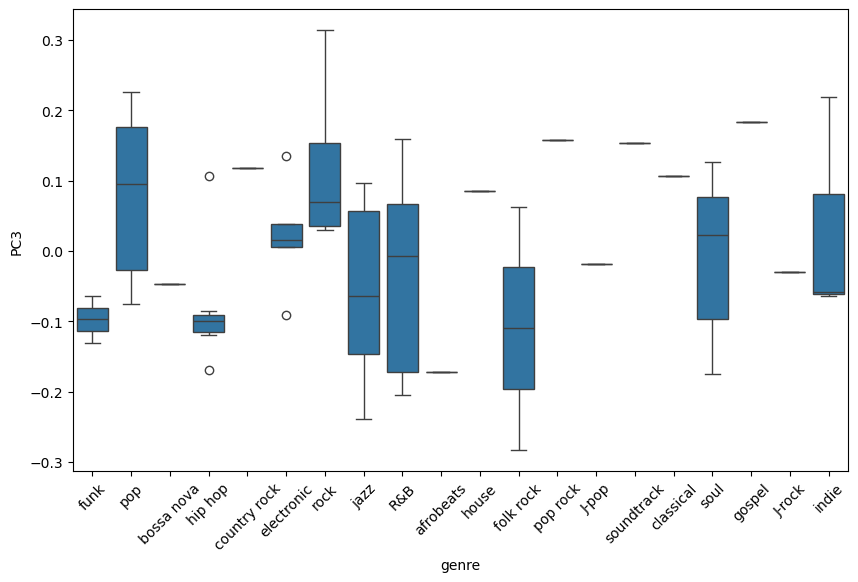

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='genre', y='PC3')
plt.xticks(rotation=45)
plt.show()

## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

How are songs distributed (if a distribution exists) in the principal‐component dimensions by genre?

- Distribution in PC space (by genre)
Across PC pairs (PC1–PC4), the genre clouds overlap substantially with only modest shifts by genre.
- PC1 shows the clearest separation: some genres sit slightly to the right (higher PC1), while others skew left (lower PC1). 
- PC2 and PC4 look centered with similar spread across genres; PC3 shows the most within-genre variability.

### Q2 

Which genre shows the highest (and lowest) average value on PC1?

- Highest/lowest average on PC1
Using all genres (includes singletons): highest ≈ J-rock; lowest ≈ Soundtrack.
- More robust (n ≥ 3 per genre): highest = Hip hop (0.145), next Rock (0.140); lowest = Jazz (-0.107), then Indie (-0.074) and Soul (~-0.069).

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

- PC3 boxplot shows wide spread for Jazz, R&B, and Folk rock.
Note: Folk rock has small n, so its whiskers aren’t very reliable. With n ≥ 3, R&B and Indie usually rank highest by IQR/STD, while Funk / Country rock look tight.
- This matches the PC2 vs PC3 and PC3 vs PC4 panels where those genres show taller vertical scatter.

### Q4

Are any pairs of PCA components strongly correlated?

- No strong relationships: pairwise correlations between PCs are near zero (This is desired and expected for PCA scores). - The scatter panels don’t show linear trends.